In [495]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.discrete.discrete_model import Logit
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import norm, beta
import numpy as np

In [496]:
df_email = pd.read_csv('email_table.csv')
df_opened = pd.read_csv('email_opened_table.csv')
df_link = pd.read_csv('link_clicked_table.csv')

In [497]:
df_email.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [498]:
df_opened.head()

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034


In [499]:
df_link.head()

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561


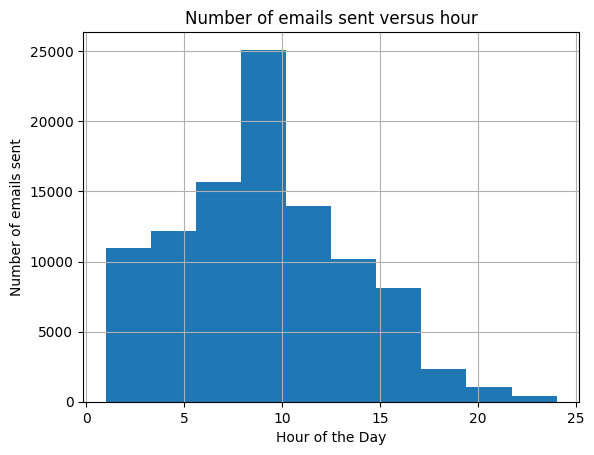

In [500]:
df_email['hour'].hist()
title = 'Number of emails sent versus hour'
plt.title(title)
plt.ylabel('Number of emails sent')
plt.xlabel('Hour of the Day')
plt.show()

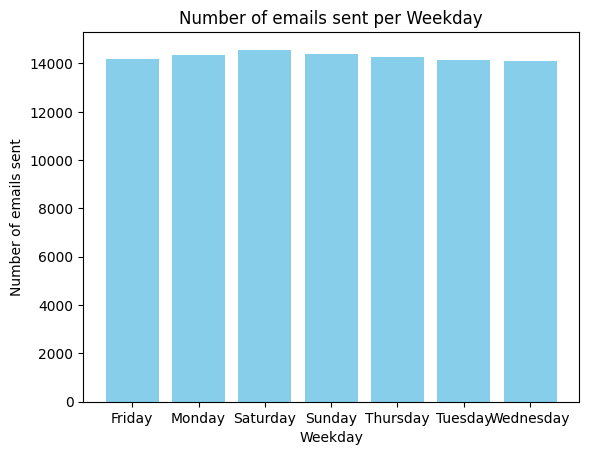

In [501]:
email_counts = df_email['weekday'].value_counts().sort_index()
plt.bar(email_counts.index, email_counts.values, color='skyblue')
title = 'Number of emails sent per Weekday'
plt.title(title)
plt.ylabel('Number of emails sent')
plt.xlabel('Weekday')
plt.show()

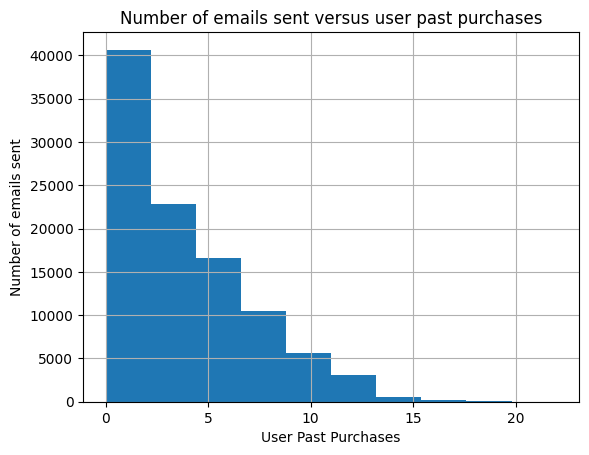

In [502]:
df_email['user_past_purchases'].hist()
title = 'Number of emails sent versus user past purchases'
plt.title(title)
plt.ylabel('Number of emails sent')
plt.xlabel('User Past Purchases')
plt.show()

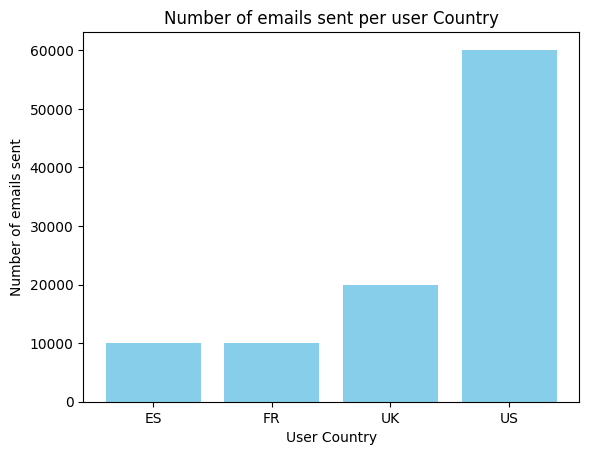

In [503]:
email_counts = df_email['user_country'].value_counts().sort_index()
plt.bar(email_counts.index, email_counts.values, color='skyblue')
title = 'Number of emails sent per user Country'
plt.title(title)
plt.ylabel('Number of emails sent')
plt.xlabel('User Country')
plt.show()

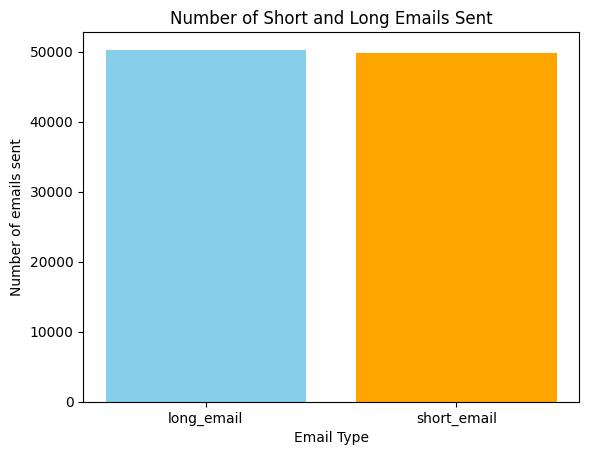

In [504]:
email_type_counts = df_email['email_text'].value_counts()
plt.bar(email_type_counts.index, email_type_counts.values, color=['skyblue', 'orange'])
title = 'Number of Short and Long Emails Sent'
plt.title(title)
plt.ylabel('Number of emails sent')
plt.xlabel('Email Type')
plt.show()

In [505]:
df_email = pd.read_csv('email_table.csv')
df_opened = pd.read_csv('email_opened_table.csv')
df_link = pd.read_csv('link_clicked_table.csv')

In [506]:
print(df_email.size)
print(df_opened.size)
print(df_link.size)

700000
10345
2119


In [507]:
df_opened['opened'] = 1
df_link['link_opened'] = 1

In [508]:
df_merge = pd.merge(df_email,df_opened,on = 'email_id',how = 'left')
df_merge['opened'] = df_merge['opened'].fillna(0)

In [509]:
df_merge = pd.merge(df_merge,df_link,on = 'email_id',how = 'left')
df_merge['link_opened'] = df_merge['link_opened'].fillna(0)

In [510]:
df_merge['opened'] = df_merge['opened'].astype(int)
df_merge['link_opened'] = df_merge['link_opened'].astype(int)

In [511]:
df_merge.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,opened,link_opened
0,85120,short_email,personalized,2,Sunday,US,5,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1
2,777221,long_email,personalized,11,Wednesday,US,2,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0


In [512]:
opened_percentage = float(df_opened.shape[0])/df_email.shape[0]
links_clicked_sent_email_percentage = float(df_link.shape[0])/df_email.shape[0]
links_clicked_open_email_percentage = float(df_link.shape[0])/df_opened.shape[0]

In [513]:
print('Opened Percentage: {:.1f}%'.format(opened_percentage * 100))
print('Links Clicked Percentage: {:.1f}%'.format(links_clicked_sent_email_percentage * 100))
print('Links Clicked Percentage in Opened Emails: {:.1f}%'.format(links_clicked_open_email_percentage * 100))

Opened Percentage: 10.3%
Links Clicked Percentage: 2.1%
Links Clicked Percentage in Opened Emails: 20.5%


C:\Users\chowd\AppData\Local\Temp\ipykernel_5748\299435613.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['email_text_numeric'] = df_email['email_text_numeric']
C:\Users\chowd\AppData\Local\Temp\ipykernel_5748\299435613.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['email_version_numeric'] = df_email['email_version_numeric']
C:\Users\chowd\AppData\Local\Temp\ipykernel_5748\299435613.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

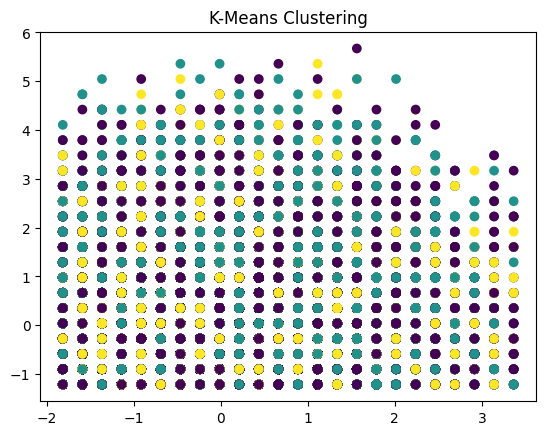

In [514]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df_email is your DataFrame
features = df_email[['hour', 'user_past_purchases']]

# Map text columns to numeric values
text_mapping1 = {'short_email': 0, 'long_email': 1}
df_email['email_text_numeric'] = df_email['email_text'].map(text_mapping1)

text_mapping2 = {'personalized': 1, 'generic': 0}
df_email['email_version_numeric'] = df_email['email_version'].map(text_mapping2)

text_mapping3 = {'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6}
df_email['weekday_numeric'] = df_email['weekday'].map(text_mapping3)

text_mapping4 = {'ES': 0, 'FR': 1, 'UK': 2, 'US': 3}
df_email['user_country_numeric'] = df_email['user_country'].map(text_mapping4)

# You can do the same for other text columns like 'email_version', 'weekday', 'user_country' if needed

# Add numeric columns to the features
features['email_text_numeric'] = df_email['email_text_numeric']
features['email_version_numeric'] = df_email['email_version_numeric']
features['weekday_numeric'] = df_email['weekday_numeric']
features['user_country_numeric'] = df_email['user_country_numeric']

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Use k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_email['cluster'] = kmeans.fit_predict(features_standardized)

# Plot the clusters using the correct DataFrame
plt.scatter(features_standardized[:, 0], features_standardized[:, 1], c=df_email['cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.show()


In [515]:
cluster_0 = df_email[df_email['cluster'] == 0]
cluster_1 = df_email[df_email['cluster'] == 1]
cluster_2 = df_email[df_email['cluster'] == 2]

Getting Dummies for Categorical Variables

In [516]:
df_out = df_merge.copy()
variables = ['hour','email_text','email_version','weekday','user_country']
df_out = pd.get_dummies(df_out,columns = variables, drop_first = True)

In [517]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   email_id                    100000 non-null  int64
 1   user_past_purchases         100000 non-null  int64
 2   opened                      100000 non-null  int32
 3   link_opened                 100000 non-null  int32
 4   hour_2                      100000 non-null  bool 
 5   hour_3                      100000 non-null  bool 
 6   hour_4                      100000 non-null  bool 
 7   hour_5                      100000 non-null  bool 
 8   hour_6                      100000 non-null  bool 
 9   hour_7                      100000 non-null  bool 
 10  hour_8                      100000 non-null  bool 
 11  hour_9                      100000 non-null  bool 
 12  hour_10                     100000 non-null  bool 
 13  hour_11                     100000 non-null  

Train and Test Split

In [518]:
X = df_out.drop('email_id', axis=1)
X = X.drop('opened', axis=1)
X = X.drop('link_opened', axis=1)
y = df_out['link_opened']
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = .5, random_state = 1)

Random Oversampling

In [519]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
from sklearn.model_selection import train_test_split

random_over_sampler = RandomOverSampler()
X_train_over_sample, y_train_over_sample = random_over_sampler.fit_resample(X_train, y_train)
X_train_over_sample = pd.DataFrame(X_train_over_sample, columns=X_train.columns)

Logistic Regression Model

In [520]:
X_train_over_sample = X_train_over_sample.to_numpy()
y_train_over_sample = y_train_over_sample.to_numpy()

In [521]:
import statsmodels.api as sm

X_train_over_sample = pd.DataFrame(X_train_over_sample, columns=X_train.columns)
X_train_over_sample['constant'] = 1
logit_model = sm.Logit(y_train_over_sample.astype(int), X_train_over_sample.astype(int))
result = logit_model.fit(maxiter = 400)

Optimization terminated successfully.
         Current function value: 0.601399
         Iterations 6


In [522]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                97898
Model:                          Logit   Df Residuals:                    97862
Method:                           MLE   Df Model:                           35
Date:                Sun, 10 Dec 2023   Pseudo R-squ.:                  0.1324
Time:                        21:10:38   Log-Likelihood:                -58876.
converged:                       True   LL-Null:                       -67858.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
user_past_purchases            0.2034      0.002     92.037      0.000       0.199       0.208
hour_2                        -0.1381      0.057     -2.419      0.016      -0.250      -0.026
hour_3                        -0.0208      0.054     -0.385      0.700      -0.126       0.085
hour_4                        -0.3184      0.053     -5.992      0.000      -0.423      -0.214
hour_5                        -0.2997      0.052     -5.802      0.000      -0.401      -0.198
hour_6                         0.0918      0.050      1.850      0.064      -0.005       0.189
hour_7                        -0.2379      0.050     -4.760      0.000      -0.336      -0.140
hour_8                         0.0603      0.049      1.237      0.216      -0.035       0.156
hour_9                         0.2304      0.048      4.780      0.000       0.136       0.325
hour_10                        0.4160      0.048      8.681      0.000       0.322       0.510
hour_11                        0.1638      0.049      3.330      0.001       0.067       0.260
hour_12                        0.1756      0.050      3.514      0.000       0.078       0.274
hour_13                       -0.0577      0.052     -1.101      0.271      -0.160       0.045
hour_14                        0.0305      0.053      0.570      0.569      -0.074       0.135
hour_15                        0.1520      0.056      2.728      0.006       0.043       0.261
hour_16                        0.1705      0.059      2.910      0.004       0.056       0.285
hour_17                       -0.1300      0.068     -1.926      0.054      -0.262       0.002
hour_18                       -0.6015      0.081     -7.407      0.000      -0.761      -0.442
hour_19                       -0.7259      0.098     -7.442      0.000      -0.917      -0.535
hour_20                       -1.0487      0.122     -8.581      0.000      -1.288      -0.809
hour_21                       -0.2485      0.141     -1.759      0.079      -0.525       0.028
hour_22                        0.8391      0.147      5.696      0.000       0.550       1.128
hour_23                        1.0161      0.162      6.270      0.000       0.698       1.334
hour_24                       -0.6746      0.271     -2.487      0.013      -1.206      -0.143
email_text_short_email         0.2797      0.014     19.791      0.000       0.252       0.307
email_version_personalized     0.5757      0.014     40.421      0.000       0.548       0.604
weekday_Monday                 0.3695      0.027     13.464      0.000       0.316       0.423
weekday_Saturday               0.1296      0.028      4.638      0.000       0.075       0.184
weekday_Sunday                 0.1792      0.028      6.410      0.000       0.124       0.234
weekday_Thursday               0.5868      0.027     21.855      0.000       0.534       0.639
weekday_Tuesday                0.4036      0.027     14.837      0.000       0.350       0.457
weekday_Wed

In [523]:
df_test = X_test.copy()
df_test['link_clicked'] = y_test.copy()
df_test['subset'] = 'Non-targeted subset'
df_test['subset'][( (df_test['hour_10'] == 1) | (df_test['hour_22'] == 1) | (df_test['hour_23'] == 1) ) & (df_test['user_past_purchases'] > 6) & (df_test['email_text_short_email'] == 1) & (df_test['email_version_personalized'] == 1) & ((df_test['weekday_Wednesday']== 1) | (df_test['weekday_Thursday'] == 1)) & ((df_test['user_country_UK'] == 1)|(df_test['user_country_US'] ==1 ))] = 'Targeted subset'
print(df_test.groupby('subset')['link_clicked'].mean(), '\n')

subset
Non-targeted subset    0.021197
Targeted subset        0.225000
Name: link_clicked, dtype: float64 



C:\Users\chowd\AppData\Local\Temp\ipykernel_5748\1333898078.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['subset'][( (df_test['hour_10'] == 1) | (df_test['hour_22'] == 1) | (df_test['hour_23'] == 1) ) & (df_test['user_past_purchases'] > 6) & (df_test['email_text_short_email'] == 1) & (df_test['email_version_personalized'] == 1) & ((df_test['weekday_Wednesday']== 1) | (df_test['weekday_Thursday'] == 1)) & ((df_test['user_country_UK'] == 1)|(df_test['user_country_US'] ==1 ))] = 'Targeted subset'


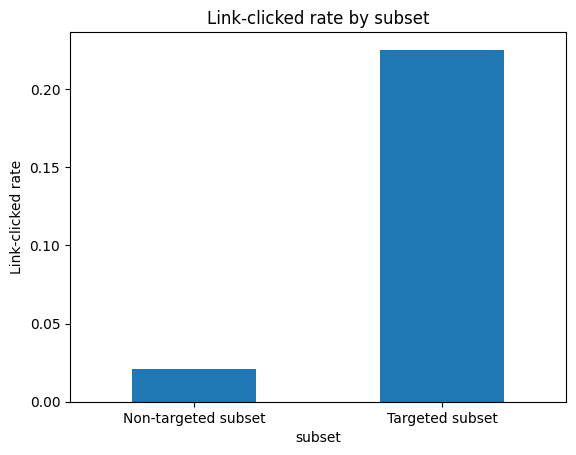

In [524]:
df_test.groupby('subset')['link_clicked'].mean().plot(kind='bar')
plt.title('Link-clicked rate by subset')
plt.ylabel('Link-clicked rate')
plt.xticks(rotation='horizontal')
plt.show()

In [525]:
Logit Regression Results
Dep. Variable:	y	No. Observations:	97898
Model:	Logit	Df Residuals:	97862
Method:	MLE	Df Model:	35
Date:	Sun, 10 Dec 2023	Pseudo R-squ.:	0.1326
Time:	20:13:47	Log-Likelihood:	-58863.
converged:	True	LL-Null:	-67858.
Covariance Type:	nonrobust	LLR p-value:	0.000
coef	std err	z	P>|z|	[0.025	0.975]
user_past_purchases	0.2057	0.002	93.156	0.000	0.201	0.210
hour_2	-0.0633	0.058	-1.097	0.272	-0.176	0.050
hour_3	-0.0099	0.055	-0.181	0.856	-0.117	0.097
hour_4	-0.2506	0.054	-4.659	0.000	-0.356	-0.145
hour_5	-0.2125	0.052	-4.070	0.000	-0.315	-0.110
hour_6	0.1576	0.050	3.133	0.002	0.059	0.256
hour_7	-0.1220	0.050	-2.416	0.016	-0.221	-0.023
hour_8	0.1494	0.049	3.024	0.002	0.053	0.246
hour_9	0.2652	0.049	5.415	0.000	0.169	0.361
hour_10	0.4813	0.049	9.899	0.000	0.386	0.577
hour_11	0.2601	0.050	5.222	0.000	0.162	0.358
hour_12	0.2702	0.051	5.343	0.000	0.171	0.369
hour_13	0.0210	0.053	0.396	0.692	-0.083	0.125
hour_14	0.0865	0.054	1.597	0.110	-0.020	0.193
hour_15	0.2123	0.056	3.767	0.000	0.102	0.323
hour_16	0.2900	0.059	4.928	0.000	0.175	0.405
hour_17	-0.0287	0.068	-0.424	0.672	-0.161	0.104
hour_18	-0.5325	0.083	-6.434	0.000	-0.695	-0.370
hour_19	-0.6229	0.097	-6.435	0.000	-0.813	-0.433
hour_20	-1.0691	0.125	-8.584	0.000	-1.313	-0.825
hour_21	-0.2216	0.143	-1.549	0.121	-0.502	0.059
hour_22	0.9032	0.146	6.177	0.000	0.617	1.190
hour_23	0.9621	0.166	5.811	0.000	0.638	1.287
hour_24	-0.3755	0.253	-1.481	0.138	-0.872	0.121
email_text_short_email	0.2752	0.014	19.475	0.000	0.248	0.303
email_version_personalized	0.5565	0.014	39.093	0.000	0.529	0.584
weekday_Monday	0.3895	0.027	14.239	0.000	0.336	0.443
weekday_Saturday	0.0997	0.028	3.562	0.000	0.045	0.154
weekday_Sunday	0.1692	0.028	6.065	0.000	0.114	0.224
weekday_Thursday	0.5818	0.027	21.696	0.000	0.529	0.634
weekday_Tuesday	0.3691	0.027	13.549	0.000	0.316	0.423
weekday_Wednesday	0.5531	0.027	20.492	0.000	0.500	0.606
user_country_FR	0.0716	0.042	1.703	0.088	-0.011	0.154
user_country_UK	1.3744	0.034	40.355	0.000	1.308	1.441
user_country_US	1.2810	0.032	40.235	0.000	1.219	1.343
constant	-3.0404	0.058	-52.020	0.000	-3.155	-2.926


SyntaxError: invalid syntax (18799281.py, line 1)

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Function to calculate CTR
def ctr_function(beta, H, P, L, G, D, C):
    H_10, H_22, H_23 = H[:, 0], H[:, 1], H[:, 2]
    D_wed, D_thurs = D[:, 0], D[:, 1]
    C_uk, C_us = C[:, 0], C[:, 1]
    linear_term = (
        beta[0] + beta[1] * H_10 + beta[2] * H_22 + beta[3] * H_23 +
        beta[4] * P + beta[5] * L + beta[6] * G +
        beta[7] * D_wed + beta[8] * D_thurs + beta[9] * C_uk + beta[10] * C_us
    )
    ctr = np.exp(linear_term) / (1 + np.exp(linear_term))
    return ctr

# Function to optimize CTR with L2 regularization and constraints
def optimize_ctr_l2_with_constraints(H, P, L, G, D, C, lambda_=0.1):
    # Initial parameters
    beta_init = np.zeros(11)

    # Constraints
    constraints = [
        {'type': 'ineq', 'fun': lambda beta: 3 - beta[1] - beta[2] - beta[3]},  # Valid Hours
        {'type': 'eq', 'fun': lambda beta: 1 - beta[5]},  # Email Length
        {'type': 'ineq', 'fun': lambda beta: 2 - beta[7] - beta[8]},  # Days of the Week
        {'type': 'ineq', 'fun': lambda beta: 2 - beta[9] - beta[10]},  # Countries
        {'type': 'ineq', 'fun': lambda beta: beta[4] - 6},  # Past Purchases
    ]

    # Objective function: minimize -mean CTR + L2 regularization
    def objective_with_l2_regularization(beta):
        ctr = ctr_function(beta, H, P, L, G, D, C)
        regularization_term = lambda_ * np.sum(beta**2)
        
        # Print intermediate results
        print("Objective Value:", -np.mean(ctr) + regularization_term)
        print("Coefficients:", beta)
        
        return -np.mean(ctr) + regularization_term

    # Optimization with L2 regularization and constraints
    res = minimize(
        objective_with_l2_regularization, beta_init, method='trust-constr',
        constraints=constraints, options={'disp': True}
    )
    beta_opt = res.x

    # Calculate and return optimized CTR
    ctr_opt = ctr_function(beta_opt, H, P, L, G, D, C)
    return beta_opt, ctr_opt

# Example usage on the training dataset
# Replace the example data with your actual training data
H_train = np.random.randint(0, 2, size=(100, 3))
P_train = np.random.rand(100)
L_train = np.random.randint(0, 2, size=(100))
G_train = np.random.randint(0, 2, size=(100))
D_train = np.random.randint(0, 2, size=(100, 2))
C_train = np.random.randint(0, 2, size=(100, 2))

# Optimize with L2 regularization and constraints on the training dataset
beta_opt_train, ctr_opt_train = optimize_ctr_l2_with_constraints(
    H_train, P_train, L_train, G_train, D_train, C_train
)

# Print optimized coefficients and CTR on the training dataset
print("Optimized Coefficients (Training):", beta_opt_train)
print("Max CTR (Training):", np.max(ctr_opt_train))

# Example usage on the test dataset
# Replace the example data with your actual test data
H_test = np.random.randint(0, 2, size=(50, 3))
P_test = np.random.rand(50)
L_test = np.random.randint(0, 2, size=(50))
G_test = np.random.randint(0, 2, size=(50))
D_test = np.random.randint(0, 2, size=(50, 2))
C_test = np.random.randint(0, 2, size=(50, 2))

# Calculate CTR on the test dataset using the optimized coefficients
ctr_test = ctr_function(beta_opt_train, H_test, P_test, L_test, G_test, D_test, C_test)

# Print Max CTR on the test dataset
print("Max CTR (Test):", np.max(ctr_test))

Objective Value: -0.5
Coefficients: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Objective Value: -0.5000000037252903
Coefficients: [1.49011612e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Objective Value: -0.5000000021234154
Coefficients: [0.00000000e+00 1.49011612e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Objective Value: -0.5000000016018749
Coefficients: [0.00000000e+00 0.00000000e+00 1.49011612e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Objective Value: -0.5000000018253923
Coefficients: [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.49011612e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Objective Value: -0.5000000021500653
Coefficients

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Function to calculate CTR
def ctr_function(beta, H, P, L, G, D, C):
    H_10, H_22, H_23 = H[:, 0], H[:, 1], H[:, 2]
    D_wed, D_thurs = D[:, 0], D[:, 1]
    C_uk, C_us = C[:, 0], C[:, 1]
    linear_term = beta[0] + beta[1] * H_10 + beta[2] * H_22 + beta[3] * H_23 + beta[4] * P + beta[5] * L + beta[6] * G + beta[7] * D_wed + beta[8] * D_thurs + beta[9] * C_uk + beta[10] * C_us
    ctr = np.exp(linear_term) / (1 + np.exp(linear_term))
    return ctr

# Function to optimize CTR with L2 regularization
def optimize_ctr_l2(H, P, L, G, D, C, lambda_=0.1):
    # Initial parameters
    beta_init = np.zeros(11)

    # Objective function: minimize -mean CTR + L2 regularization
    def objective_with_l2_regularization(beta):
        ctr = ctr_function(beta, H, P, L, G, D, C)
        regularization_term = lambda_ * np.sum(beta**2)
        return -np.mean(ctr) + regularization_term

    # Optimization with L2 regularization
    res = minimize(objective_with_l2_regularization, beta_init, method='L-BFGS-B')
    beta_opt = res.x

    # Calculate and return optimized CTR
    ctr_opt = ctr_function(beta_opt, H, P, L, G, D, C)
    return beta_opt, ctr_opt

# Example usage
H = np.random.randint(0, 2, size=(100, 3))
P = np.random.rand(100)
L = np.random.randint(0, 2, size=(100))
G = np.random.randint(0, 2, size=(100))
D = np.random.randint(0, 2, size=(100, 2))
C = np.random.randint(0, 2, size=(100, 2))

# Optimize without regularization
beta_opt_no_reg, ctr_opt_no_reg = optimize_ctr(H, P, L, G, D, C)

# Optimize with L2 regularization
beta_opt_l2, ctr_opt_l2 = optimize_ctr_l2(H, P, L, G, D, C)

# Compare CTRs
print("CTR without regularization:", ctr_opt_no_reg)
print("CTR with L2 regularization:", ctr_opt_l2)

# Compare model complexity
print("Model complexity without regularization:", np.sum(beta_opt_no_reg**2))
print("Model complexity with L2 regularization:", np.sum(beta_opt_l2**2))

CTR without regularization: 0.9999938444241009
CTR with L2 regularization: [0.86293741 0.75761867 0.87949754 0.91143632 0.83031774 0.86774517
 0.84674446 0.78076016 0.91166109 0.87624323 0.91947726 0.79952994
 0.89590731 0.80419943 0.86949767 0.89690526 0.89555401 0.8818446
 0.9222714  0.7721413  0.88707566 0.91151596 0.92739697 0.85386721
 0.89605485 0.91445668 0.91817863 0.79353637 0.90990359 0.74890605
 0.79940062 0.86065679 0.85352586 0.83259049 0.84866865 0.91862564
 0.84737353 0.91846288 0.92462093 0.81926754 0.83124747 0.84014576
 0.79316736 0.83342873 0.89445253 0.89185632 0.88052042 0.90144814
 0.80497058 0.86181542 0.88196071 0.8925294  0.87122489 0.88750091
 0.85384537 0.86400545 0.89926549 0.83751131 0.88087175 0.89479659
 0.8602514  0.89462703 0.84756071 0.85674625 0.89839616 0.85705509
 0.82862158 0.85659205 0.86920393 0.87961139 0.88289352 0.93235465
 0.93714202 0.84914398 0.77368529 0.82539358 0.91816239 0.7985812
 0.89764491 0.85029026 0.87513189 0.92573616 0.89761806 

In [ ]:
# Example usage on test dataset
H_test = np.random.randint(0, 2, size=(100, 3))
P_test = np.random.rand(100)
L_test = np.random.randint(0, 2, size=(100))
G_test = np.random.randint(0, 2, size=(100))
D_test = np.random.randint(0, 2, size=(100, 2))
C_test = np.random.randint(0, 2, size=(100, 2))

# Optimize without regularization on test dataset
beta_opt_no_reg_test, ctr_opt_no_reg_test = optimize_ctr(H_test, P_test, L_test, G_test, D_test, C_test)

# Optimize with L2 regularization on test dataset
beta_opt_l2_test, ctr_opt_l2_test = optimize_ctr_l2(H_test, P_test, L_test, G_test, D_test, C_test)

# Compare CTRs on test dataset
print("CTR without regularization on test dataset:", np.mean(ctr_opt_no_reg_test))
print("CTR with L2 regularization on test dataset:", np.mean(ctr_opt_l2_test))

# Compare model complexity on test dataset
print("Model complexity without regularization on test dataset:", np.sum(beta_opt_no_reg_test**2))
print("Model complexity with L2 regularization on test dataset:", np.sum(beta_opt_l2_test**2))

CTR without regularization on test dataset: 0.9999932572327885
CTR with L2 regularization on test dataset: 0.8639891265935955
Model complexity without regularization on test dataset: 65.05219618330307
Model complexity with L2 regularization on test dataset: 1.0357866624173107


In [ ]:
import numpy as np
from scipy.optimize import minimize

# Function to calculate CTR
def ctr_function(beta, H, P, L, G, D, C):
    H_10, H_22, H_23 = H[:, 0], H[:, 1], H[:, 2]
    D_wed, D_thurs = D[:, 0], D[:, 1]
    C_uk, C_us = C[:, 0], C[:, 1]
    linear_term = (
        beta[0] + beta[1] * H_10 + beta[2] * H_22 + beta[3] * H_23 +
        beta[4] * P + beta[5] * L + beta[6] * G +
        beta[7] * D_wed + beta[8] * D_thurs + beta[9] * C_uk + beta[10] * C_us
    )
    ctr = np.exp(linear_term) / (1 + np.exp(linear_term))
    return ctr

# Function to optimize CTR with L2 regularization and constraints
def optimize_ctr_l2_with_constraints(H, P, L, G, D, C, lambda_=0.1):
    # Initial parameters
    beta_init = np.zeros(11)

    # Constraints
    constraints = [
        {'type': 'ineq', 'fun': lambda beta: 3 - beta[1] - beta[2] - beta[3]},  # Valid Hours
        {'type': 'eq', 'fun': lambda beta: 1 - beta[5]},  # Email Length
        {'type': 'ineq', 'fun': lambda beta: 2 - beta[7] - beta[8]},  # Days of the Week
        {'type': 'ineq', 'fun': lambda beta: 2 - beta[9] - beta[10]},  # Countries
        {'type': 'ineq', 'fun': lambda beta: beta[4] - 6},  # Past Purchases
    ]

    # Objective function: minimize mean CTR + L2 regularization
    def objective_with_l2_regularization(beta):
        ctr = ctr_function(beta, H, P, L, G, D, C)
        regularization_term = lambda_ * np.sum(beta**2)
        return np.mean(ctr) + regularization_term

    # Optimization with L2 regularization and constraints
    res = minimize(
        objective_with_l2_regularization, beta_init, method='trust-constr',
        constraints=constraints, options={'disp': True}
    )
    beta_opt = res.x

    # Calculate and return optimized CTR
    ctr_opt = ctr_function(beta_opt, H, P, L, G, D, C)
    return beta_opt, ctr_opt

# Example usage on the training dataset
# Replace the example data with your actual training data
H_train = np.random.randint(0, 2, size=(100, 3))
P_train = np.random.rand(100)
L_train = np.random.randint(0, 2, size=(100))
G_train = np.random.randint(0, 2, size=(100))
D_train = np.random.randint(0, 2, size=(100, 2))
C_train = np.random.randint(0, 2, size=(100, 2))

# Optimize with L2 regularization and constraints on the training dataset
beta_opt_train, ctr_opt_train = optimize_ctr_l2_with_constraints(
    H_train, P_train, L_train, G_train, D_train, C_train
)

# Print optimized coefficients and CTR on the training dataset
print("Optimized Coefficients (Training):", beta_opt_train)
#print("Max CTR (Training):", np.min(ctr_opt_train))

# Example usage on the test dataset
# Replace the example data with your actual test data
H_test = np.random.randint(0, 2, size=(50, 3))
P_test = np.random.rand(50)
L_test = np.random.randint(0, 2, size=(50))
G_test = np.random.randint(0, 2, size=(50))
D_test = np.random.randint(0, 2, size=(50, 2))
C_test = np.random.randint(0, 2, size=(50, 2))

# Calculate CTR on the test dataset using the optimized coefficients
ctr_test = ctr_function(beta_opt_train, H_test, P_test, L_test, G_test, D_test, C_test)

# Print Min CTR on the test dataset
print("Max CTR (Training):", np.min(ctr_test))
print("Max CTR (Test):", np.min(ctr_opt_train))

c:\Users\chowd\Documents\NEU\Projects\Optimizing-Email-Marketing-master\venv\Lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`xtol` termination condition is satisfied.
Number of iterations: 531, function evaluations: 6468, CG iterations: 764, optimality: 5.96e-08, constraint violation: 0.00e+00, execution time:  2.1 s.
Optimized Coefficients (Training): [-0.66053837 -0.37155915 -0.32009965 -0.31038963  6.00000001  1.
 -0.33923199 -0.30784181 -0.35038131 -0.33730948 -0.30007936]
Max CTR (Training): 0.11073866008055853
Max CTR (Training): 0.17555285474147195
Max CTR (Test): 0.11073866008055853
